In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('MR data - Compiled Data Set.csv')
data.head(1)

,City,Title,Text,"Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other",Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act,Number of adult victims,Number of childs invoved
0,Ghaziabad,"Minor molests mute girl, sent to observation home",GHAZIABAD: A 12-year-old boy was sent to an ob...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,10",NaN,3.0


In [3]:
data = data.drop(['Title'],axis = 1)
data = data.drop(['Text'],axis = 1)

In [4]:
data = data.rename(columns = {'Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other': 'Murder Happened with reason', 'Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act': 'Section','Kidnnaping:\nNumber of child victims':'Number of kidnapped child victims'}, inplace = False)
data.tail(2)

,City,Murder Happened with reason,Number of child victims,Number of male victims(adult),Number of female victims(adult),Number of kidnapped child victims,Number of male(adult),Number of female(adult),Section,Number of adult victims,Number of childs invoved
464,Lucknow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1.0,NaN
465,Lucknow,Petty Quarrels,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data = data.fillna(0)
col = data.columns
data.head(5)

,City,Murder Happened with reason,Number of child victims,Number of male victims(adult),Number of female victims(adult),Number of kidnapped child victims,Number of male(adult),Number of female(adult),Section,Number of adult victims,Number of childs invoved
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [6]:
dict = {0:0,'Property Disputes':1,'Family Dispute':2,'Petty Quarrels':3,'Money Disputes':4, 'Personal Vendetta':5, 'Love Affairs':6, 'Casteism':7,'Unknown reasons':8}
data['Murder Happened with reason'] = data['Murder Happened with reason'].apply(lambda x : dict[x])

In [7]:
size = data.size
size = int(size/11)
size

466

In [8]:
data['Total Murders'] = 0
data['Total Kidnaps'] = 0
data.head(4)

,City,Murder Happened with reason,Number of child victims,Number of male victims(adult),Number of female victims(adult),Number of kidnapped child victims,Number of male(adult),Number of female(adult),Section,Number of adult victims,Number of childs invoved,Total Murders,Total Kidnaps
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0,0,0
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0


In [9]:
data['Total Murders'] = data['Number of child victims'] + data['Number of male victims(adult)']
data['Total Murders'] = data['Total Murders'] + data['Number of female victims(adult)']

In [10]:
for i in range(0,size-1) :
    data.iat[i,12] = data.iat[i,5] + data.iat[i,6] + data.iat[i,7]

data.tail(4)

,City,Murder Happened with reason,Number of child victims,Number of male victims(adult),Number of female victims(adult),Number of kidnapped child victims,Number of male(adult),Number of female(adult),Section,Number of adult victims,Number of childs invoved,Total Murders,Total Kidnaps
462,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0
463,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,"3,8",0.0,1.0,0.0,0
464,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,8,1.0,0.0,0.0,0
465,Lucknow,3,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0


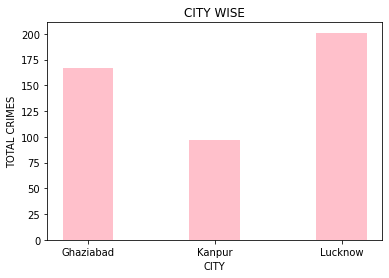

In [11]:
count1 = 0
count2 = 0
count3 = 0
for i in range(0,size -1) :
    if data.iat[i,0]=="Ghaziabad":
        count1 = count1 + 1
    elif data.iat[i,0]=="Kanpur":
        count2 = count2 + 1
    elif data.iat[i,0]=="Lucknow":
        count3 = count3 + 1
city=list(("Ghaziabad","Kanpur","Lucknow"))     
count=list((count1,count2,count3))  
plt.bar(city, count, color ='pink',width = 0.4)
 
plt.xlabel("CITY")
plt.ylabel("TOTAL CRIMES")
plt.title("CITY WISE")
plt.show()

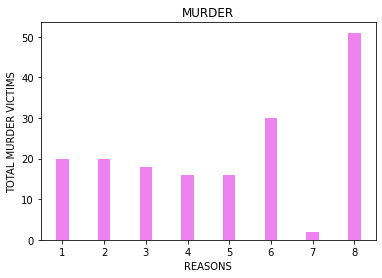

In [12]:
count1=0
count2=0
count3=0
count4=0
count5=0
count6=0
count7=0
count8=0
for i in range(0,465) :
    if data.iat[i,1]==1:
        count1 = count1 + data.iat[i,11]
    elif data.iat[i,1]==2:
        count2 = count2 + data.iat[i,11]
    elif data.iat[i,1]==3:
        count3 = count3 + data.iat[i,11]
    elif data.iat[i,1]==4:
        count4 = count4 + data.iat[i,11]
    elif data.iat[i,1]==5:
        count5 = count5 + data.iat[i,11]
    elif data.iat[i,1]==6:
        count6 = count6 + data.iat[i,11]
    elif data.iat[i,1]==7:
        count7 = count7 + data.iat[i,11]
    elif data.iat[i,1]==8:
        count8 = count8 + data.iat[i,11]
    
reasons=list(("1","2","3","4","5","6","7","8"))     
count=list((count1,count2,count3,count4,count5,count6,count7,count8))  
plt.bar(reasons, count, color ='violet',width = 0.3)

plt.xlabel("REASONS")
plt.ylabel("TOTAL MURDER VICTIMS")
plt.title("MURDER")
plt.show()

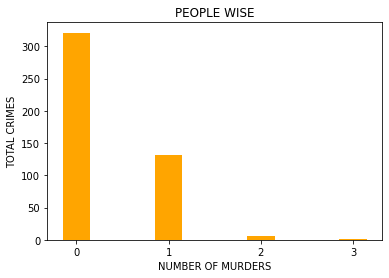

In [13]:
count0 = 0
count1 = 0
count2 = 0
count3 = 0
for i in range(0,465) :
    if data.iat[i,11]==0:
        count0 = count0 + 1
    elif data.iat[i,11]==1:
        count1 = count1 + 1
    elif data.iat[i,11]==2:
        count2 = count2 + 1
    elif data.iat[i,11]==3:
        count3 = count3 + 1
people=list(("0","1","2","3"))     
count=list((count0,count1,count2,count3))  
plt.bar(people, count, color ='orange',width = 0.3)
 
plt.xlabel("NUMBER OF MURDERS")
plt.ylabel("TOTAL CRIMES")
plt.title("PEOPLE WISE")
plt.show()

In [14]:
data['S0'] = 0
data['S1'] = 0
data['S2'] = 0
for i in range(0,len(data)):
    if ',' in str(data.at[i,'Section']):
        cl = data.at[i,'Section'].split(',')
        data.at[i,'S0']=int(cl[0])
        data.at[i,'S1']=int(cl[1])
        if len(cl)>2:
            data.at[i,'S2']=int(cl[2])
    else:
        data.at[i,'S0']=int(data.at[i,'Section'])
data.tail(5)

,City,Murder Happened with reason,Number of child victims,Number of male victims(adult),Number of female victims(adult),Number of kidnapped child victims,Number of male(adult),Number of female(adult),Section,Number of adult victims,Number of childs invoved,Total Murders,Total Kidnaps,S0,S1,S2
461,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,7,1.0,0.0,0.0,0,7,0,0
462,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0,1,0,0
463,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,"3,8",0.0,1.0,0.0,0,3,8,0
464,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,8,1.0,0.0,0.0,0,8,0,0
465,Lucknow,3,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0,0,0,0


In [15]:
# Crimes against women

var0 = data['S0'].value_counts().sort_index()
var1 = data['S1'].value_counts().sort_index()
var2 = data['S2'].value_counts().sort_index()
var1[0] = 0
var2[0] = 0

var = var0.add(var1, fill_value = 0)
var = var.add(var2, fill_value = 0)

var

0     266.0
1      19.0
2      19.0
3      25.0
4       7.0
5       3.0
6      22.0
7      55.0
8      63.0
9      10.0
10     49.0
11      3.0
dtype: float64

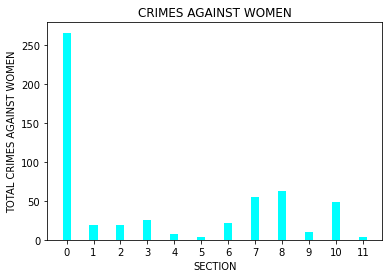

In [16]:
section=list(("0","1","2","3","4","5","6","7","8","9","10","11"))     
count=list((var[0],var[1],var[2],var[3],var[4],var[5],var[6],var[7],var[8],var[9],var[10],var[11]))  
plt.bar(section, count, color ='cyan',width = 0.3)

plt.xlabel("SECTION")
plt.ylabel("TOTAL CRIMES AGAINST WOMEN")
plt.title("CRIMES AGAINST WOMEN")
plt.show()